# Трифонов Никита Дмитриевич  
### trifonov28rus@gmail.com  
### tg: @qwertypine

# Задание 2: Полезность входных переменных

Таблица содержит 11 столбцов чисел. Первые 10 столбцов - входные переменные (x_1,...., x_10), 11-й столбец - выходная прогнозируемая переменная y. Каждая строка в файле - это один обучающий пример для построения статистической модели для зависимости y = y(x_1,x_2,..,x_10). Конкретный вид связи между выходной и входными переменными не известен.  

Требуется провести разведочный анализ данных, выбрать критерий для точности модели, и указать степень важности (информативности) каждой из 10 входных переменных с точки зрения точности модели.  

Опишите Ваше решение, и приложите, пожалуйста, тексты программ. Если были использованывнешние компоненты и библиотеки, то укажите их. Предпочтителен язык R. Приложение: файл task2.txt.

### Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import *
from math import fabs
from scipy.stats import invgauss
import scipy
import random
import json
import math
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns
%matplotlib inline

# задаем для воспроизводимости результатов
np.random.seed(42)

import filecmp
import os
import subprocess
import tempfile
import librosa
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytest
import seaborn as sb
import tqdm

Using TensorFlow backend.


## Разведочный анализ данных

In [2]:
#работа с датасетом
df2 = pd.read_csv('/home/user/Programs/Svyaznoy/task2.txt', encoding = "ISO-8859-1", sep='\t', header=None)

In [3]:
df2

,0,1,2,3,4,5,6,7,8,9,10
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20
...,...,...,...,...,...,...,...,...,...,...,...
995,0.162843,0.435990,0.149917,0.665505,0.914584,0.630336,0.384881,0.407224,0.328757,0.994527,16
996,0.907179,0.737143,0.830932,0.799533,0.214602,0.800022,0.504500,0.494688,0.462960,0.276626,20
997,0.505830,0.163747,0.146821,0.667286,0.573377,0.585563,0.934153,0.312294,0.854859,0.607592,15
998,0.296363,0.720200,0.434514,0.755218,0.613471,0.940339,0.329413,0.763345,0.018250,0.474626,17


In [4]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490491,0.499785,0.496466,0.503167,0.508902,0.513466,0.487111,0.498870,0.505611,0.499113,15.014000
std,0.293920,0.278833,0.298024,0.284102,0.283300,0.291059,0.288407,0.285954,0.283131,0.284073,4.771223
min,0.000188,0.000085,0.003110,0.001223,0.005314,0.000517,0.000493,0.000408,0.007883,0.000170,3.000000
25%,0.218825,0.262168,0.231492,0.268925,0.274572,0.255524,0.237778,0.256103,0.262332,0.249675,12.000000
50%,0.504439,0.500901,0.484347,0.503412,0.508629,0.527155,0.475274,0.501300,0.518847,0.509422,15.000000
75%,0.738004,0.734516,0.764729,0.747587,0.742461,0.766870,0.738885,0.736849,0.748473,0.741870,18.000000
max,0.999566,0.999959,0.998918,0.998785,0.998478,0.999059,0.999179,0.998646,0.998884,0.998819,29.000000


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


### Перекрестная зависимость

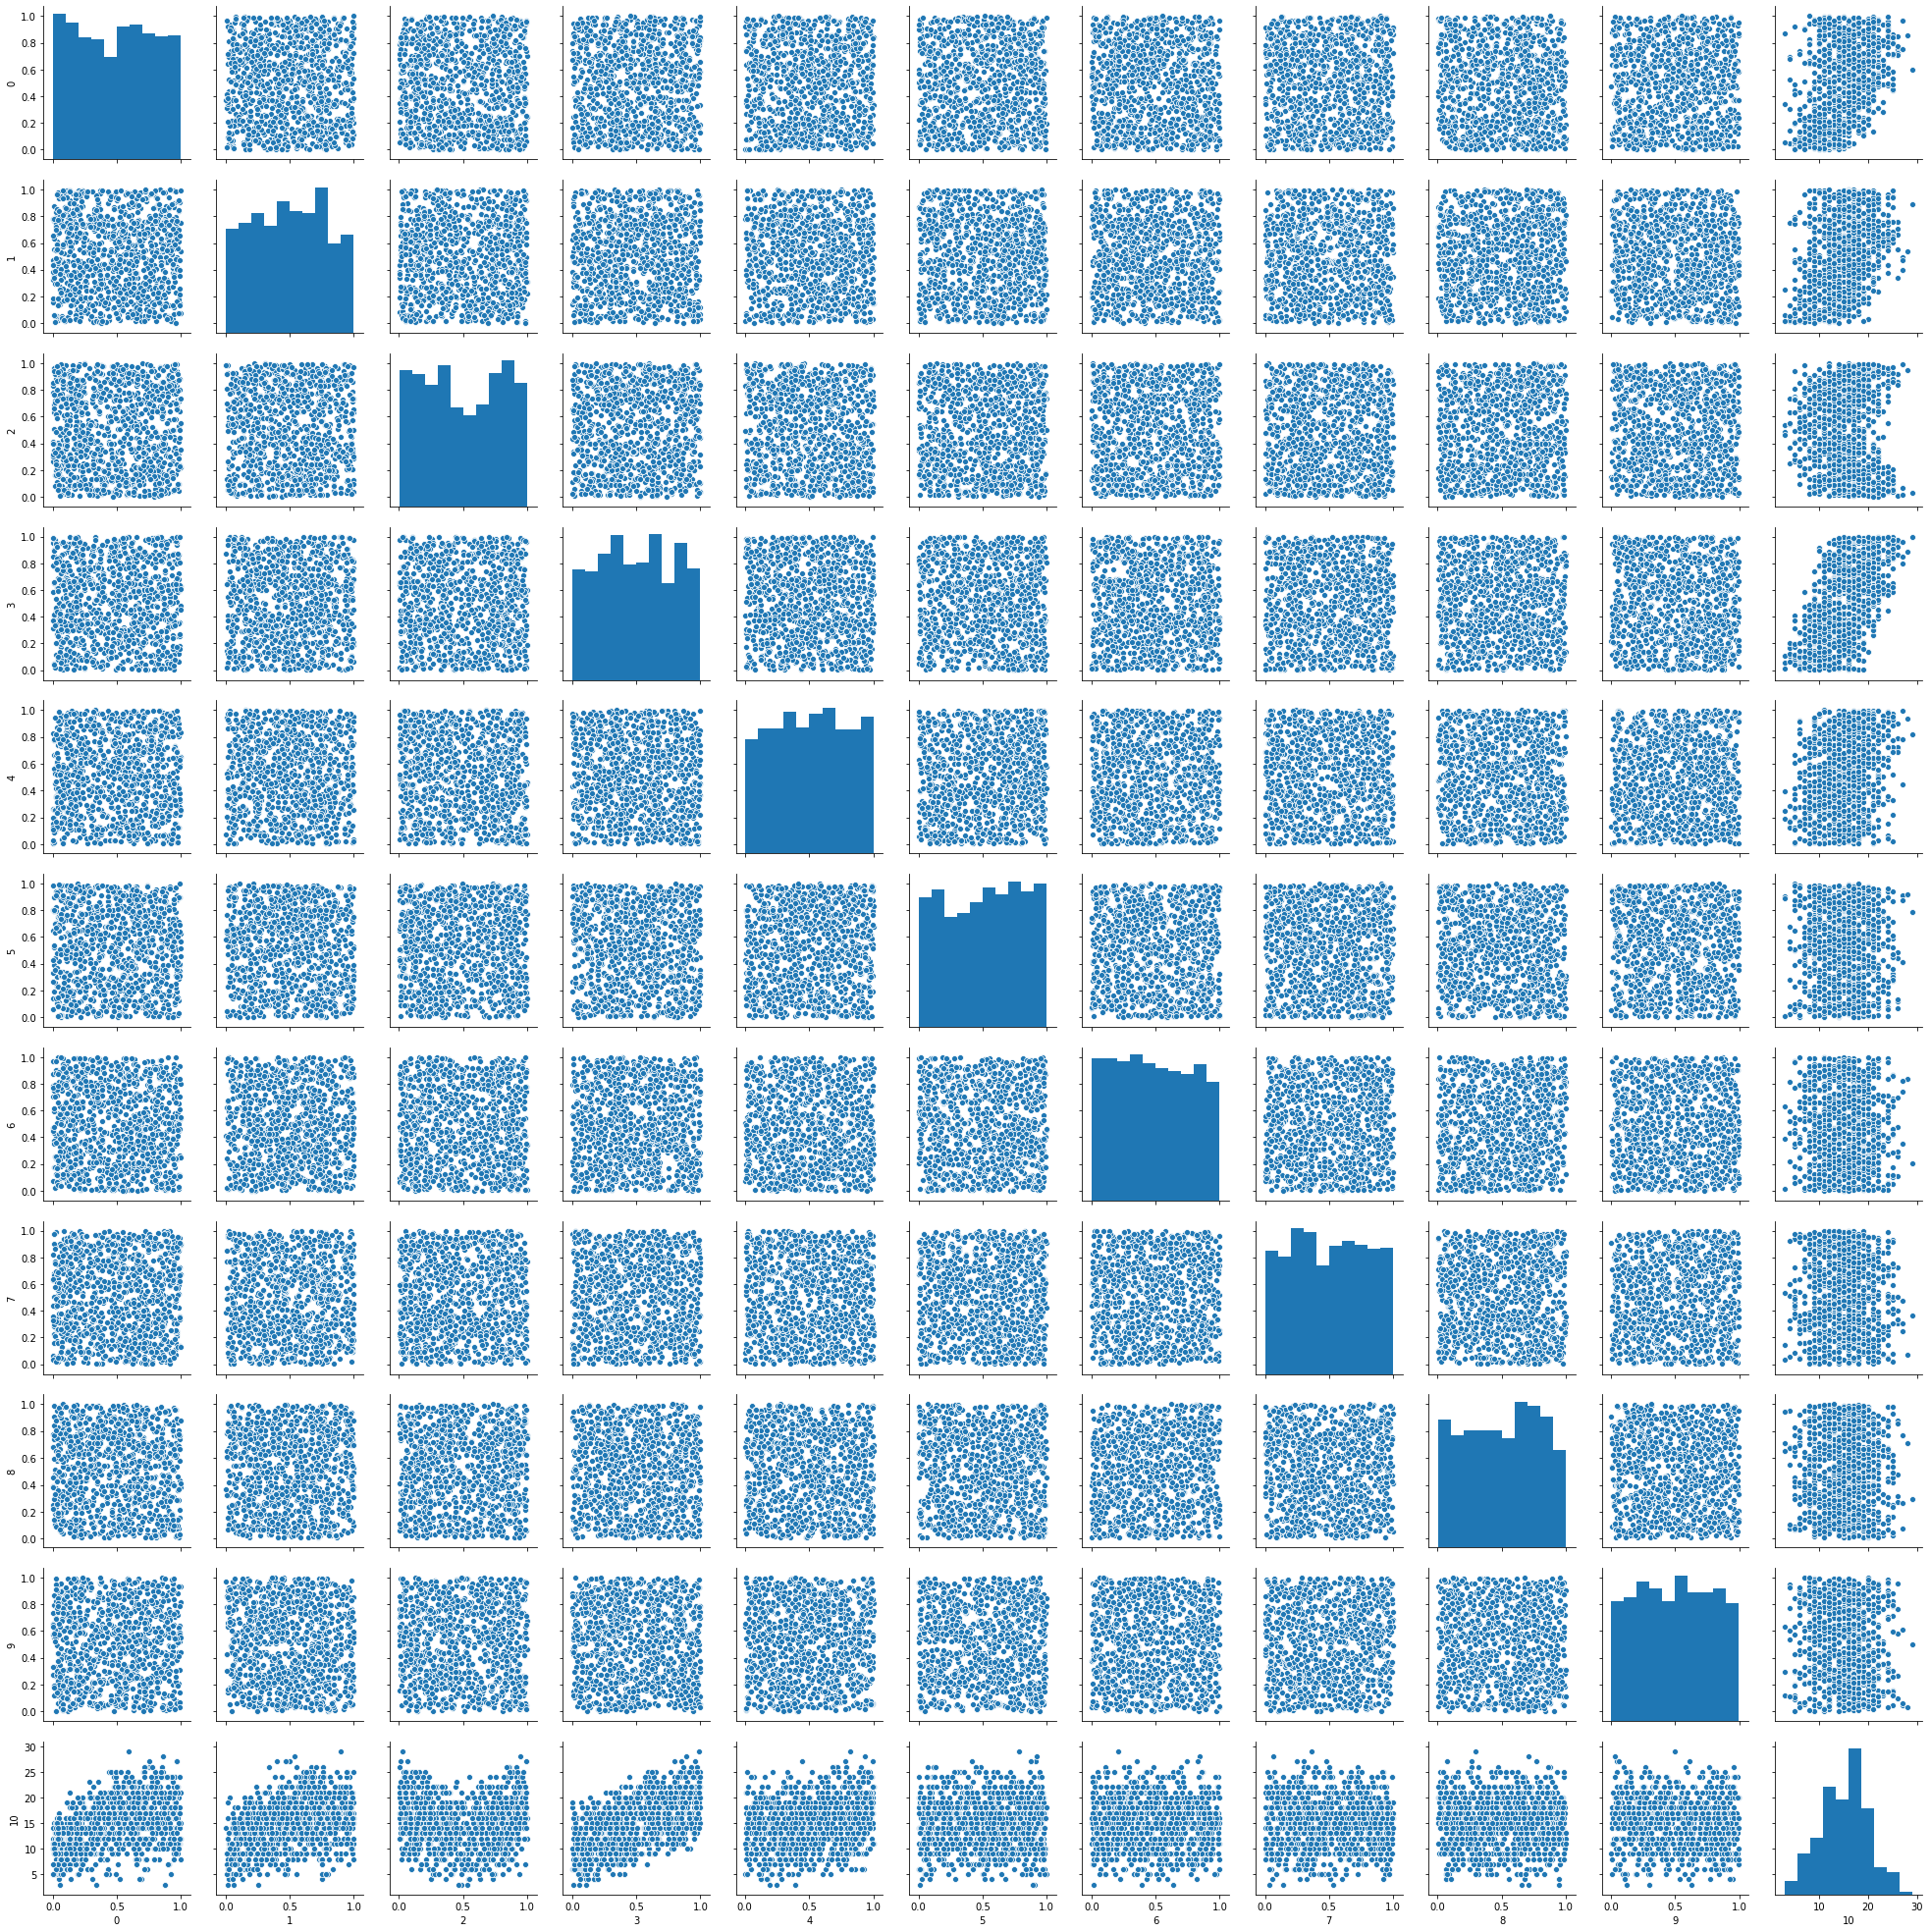

In [6]:
g=sns.pairplot(df2)

P.s.: можно заметить, что 2 признак можно привети к более удобному виду, но конструирование новых признаков является темой отдельной задачи.

### Матрица корреляций

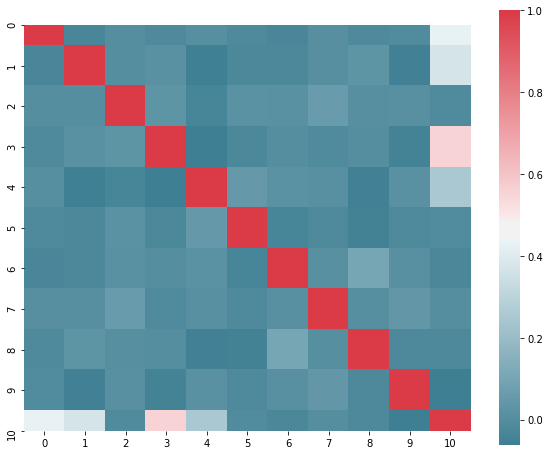

In [7]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap((df2.corr()),
            mask=np.zeros_like((df2.corr()), dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [8]:
# разделим на признаки и ярлыки
X = df2.iloc[:, 0:10]
Y = df2.iloc[:, 10]

Проверим нашу модель через кросс-валидацию.  
Мы не знаем природу данных, поэтому будем использовать симметричные метрики.  
выберем метрику - коэффициент детерминации.

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
scores = cross_val_score(reg, X, Y, cv=5, scoring='r2')

ans1 = scores.mean()

In [10]:
ans1

0.7311132735983923

## Выбор модели и оценка важности входных признаков

Основные способы оценки значимости признаков для моделей:  
* Линейные модели: веса при масштабированных признаках
* Деревья: именение критерия информативности
* Случайные леса: перестановка значений признака

Для простоты анализа выберем линейную регрессию.

In [11]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Веса регрессии и коэф. корреляции для признаков')

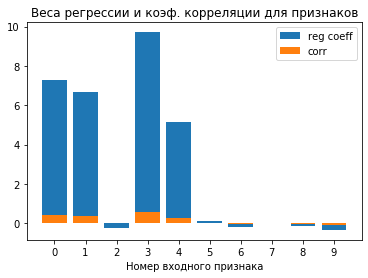

In [12]:
plt.bar(range(0,10,1),list(reg.coef_), label='reg coeff')
plt.bar(range(0,10,1), list(df2.corr()[10])[0:10], label='corr')
plt.xticks(range(0,10,1))
plt.xlabel('Номер входного признака')
plt.legend()
plt.title('Веса регрессии и коэф. корреляции для признаков')

Значимость признаков видна из графика, пропорционально модулю весов.

Отобранные признаки: 3, 0, 1, 4.

### Выделение значимых признаков при помощи L1 и L2 регкуляризации

In [13]:
from sklearn.linear_model import Lasso, Ridge

In [14]:
a = np.arange(1, 10, 1) 
coefs_lasso = np.zeros((a.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((a.shape[0], X.shape[1]))


for i in range(len(a)):
    lasso_regressor=Lasso(alpha=a[i])
    lasso_regressor.fit(X,Y)
    for j in range(len(lasso_regressor.coef_)):
        coefs_lasso[i,j]=lasso_regressor.coef_[j]
        
for i in range(len(a)):
    ridge_regressor=Ridge(alpha=a[i])
    ridge_regressor.fit(X,Y)
    for j in range(len(ridge_regressor.coef_)):
        coefs_ridge[i,j]=ridge_regressor.coef_[j]


Text(0.5, 1.0, 'Ridge')

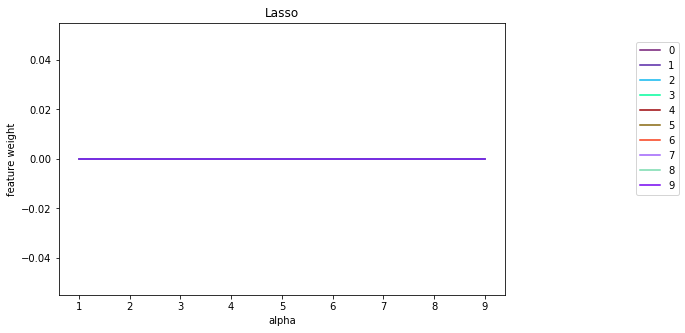

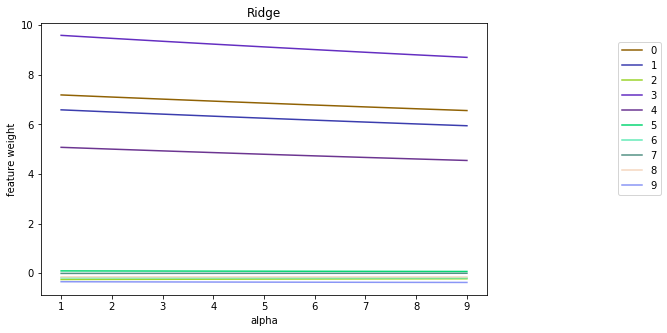

In [15]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, X.columns):
    plt.plot(a, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")
#plt.ylim(-0.01, 0.01)

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, X.columns):
    plt.plot(a, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Лассо слишко агрессивно снижает веса.

Отобранные признаки: 3, 0, 1, 4. Результат, аналогичный анализу весов для линейной регрессиии.